In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/home/gilkey/learn/time_series/24 - Classic Time Series/data/daily_min_temp.csv',index_col='Date', parse_dates=['Date'])
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Resample Series Data

<AxesSubplot:xlabel='Date'>

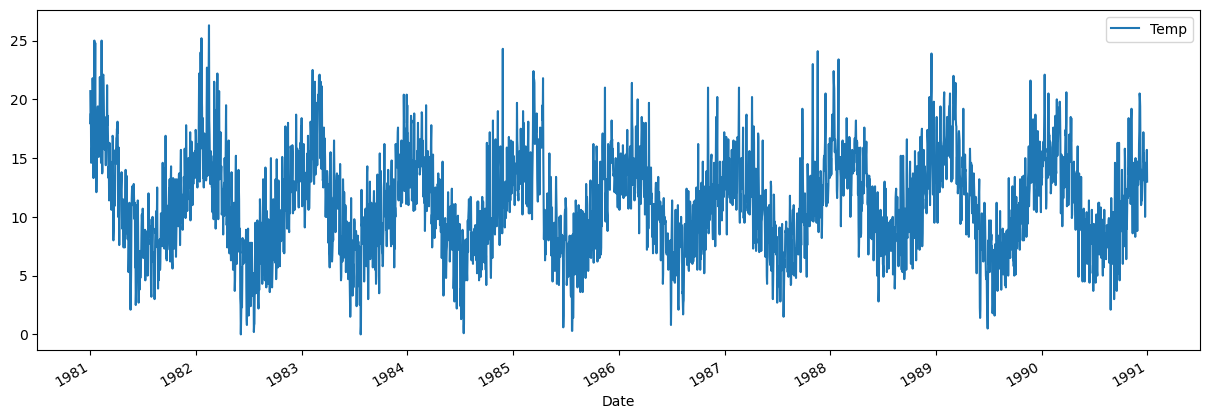

In [3]:
df.plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

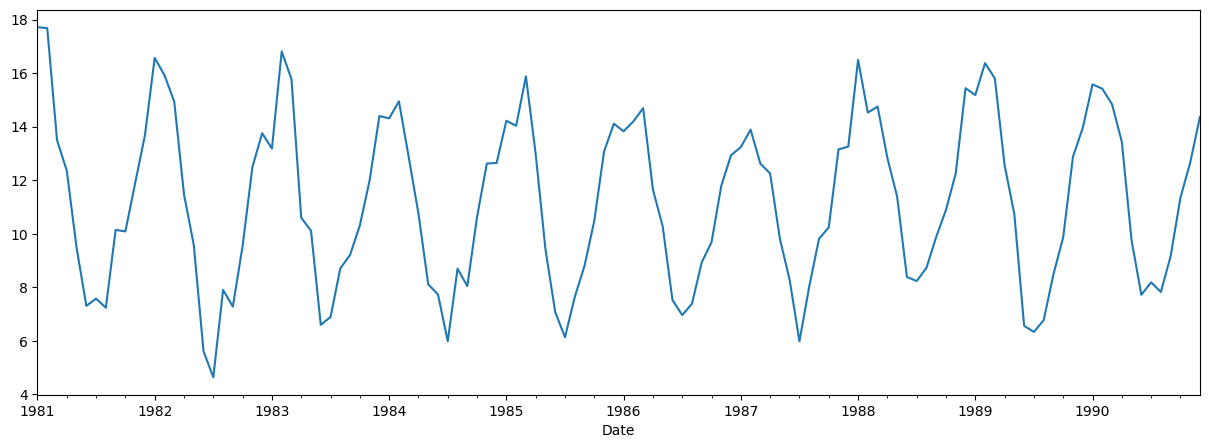

In [4]:
df = df.resample('M').mean()
df.Temp.plot(figsize=(15,5))

## Naive Forecasting

##### One Shift

In [5]:
series = df.copy()
pred = series.shift(1)
pred.head()

,Temp
Date,
1981-01-31,NaN
1981-02-28,17.712903
1981-03-31,17.678571
1981-04-30,13.500000
1981-05-31,12.356667


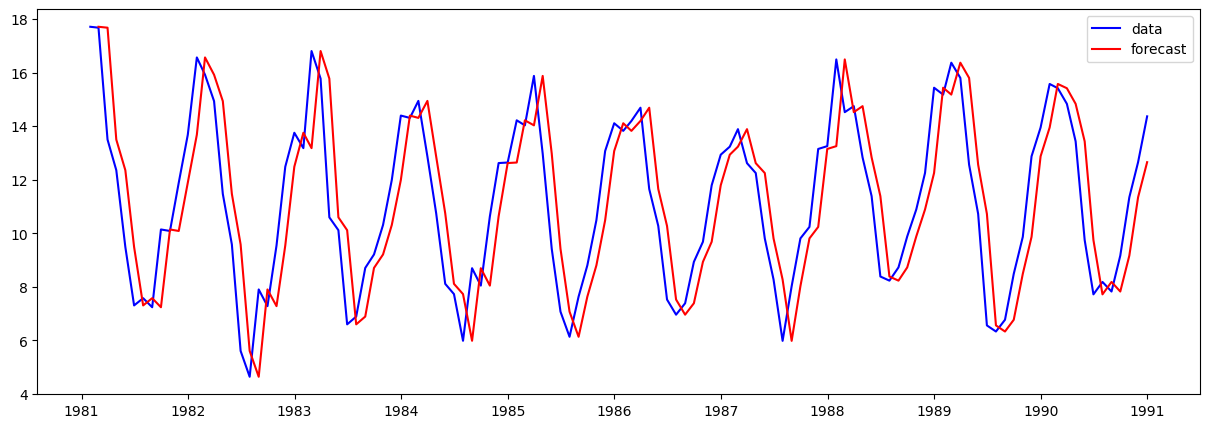

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df.Temp, 'b-', label='data')
plt.plot(pred.Temp, 'r-', label='forecast')
plt.legend()

##### Mean as Forecast

In [8]:
series = df.copy()
series.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = series.shift(1)

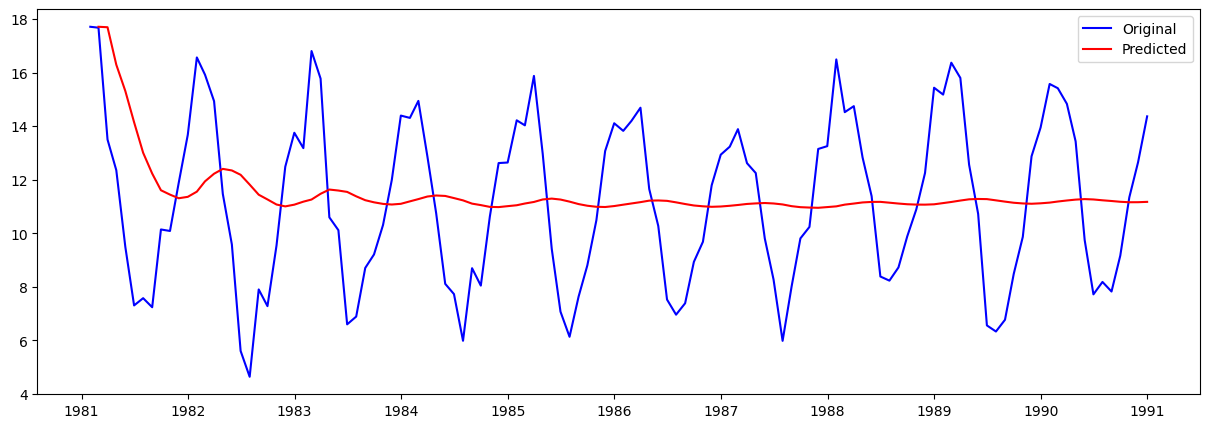

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df.Temp, 'b-', label="Original")
plt.plot(pred.index, pred.Temp, 'r-', label="Predicted")
plt.legend(loc="best")

##### Rolling Mean Forecasting / Moving Average

In [11]:
pred = df.copy()
pred.Temp = df.rolling(3).mean().shift(1)
pred.head()

,Temp
Date,
1981-01-31,NaN
1981-02-28,NaN
1981-03-31,NaN
1981-04-30,16.297158
1981-05-31,14.511746


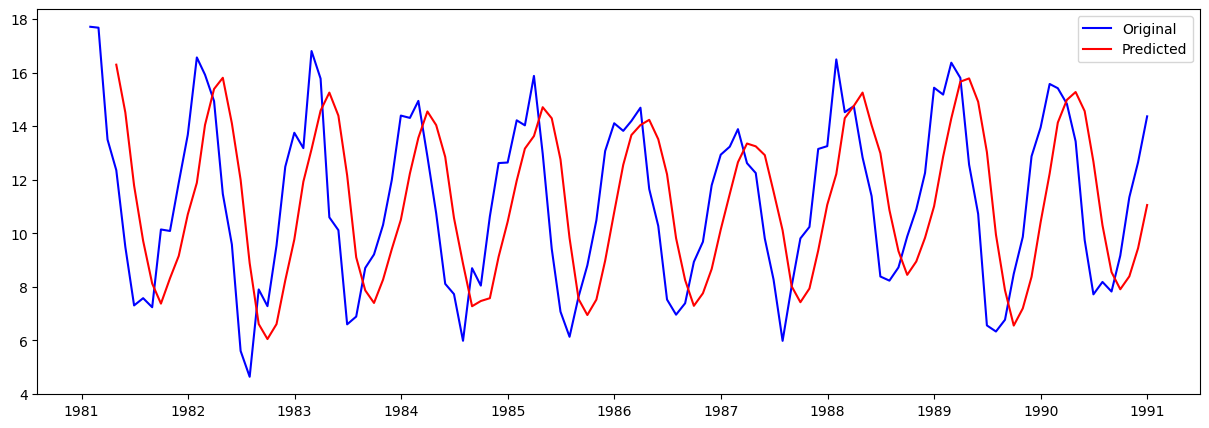

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df.Temp, 'b-', label="Original")
plt.plot(pred.index, pred.Temp, 'r-', label="Predicted")
plt.legend(loc="best")